<a href="https://colab.research.google.com/github/adiego8/test_c_data/blob/master/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main packages installation 

In [0]:
!pip install sklearn
!pip install scipy
!pip install pandas
!pip install numpy


Importing libraries to be used in the code

In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Start training process

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Claimscsv.csv to Claimscsv (2).csv


In [0]:
import io     #put the csv file as a dataframe in pandas
df = pd.read_csv(io.BytesIO(uploaded['Claimscsv.csv']))

In [0]:
data_train = pd.DataFrame()
data_test = pd.DataFrame()

#total columns in the dataframe
total_columns = df.shape[0] - 1  
split_number = total_columns * 0.75
 
#create dataframe test and train and casting the split_number to integer
data_train = df[:int(split_number)]
data_test = df[int(split_number):]


The dataframes are ready to start analyzing the data 
Objectives: Based on the cost of claims by car brand the system will generate a visualized expoaure by car brands, therefore it will help on pricing the policies

---



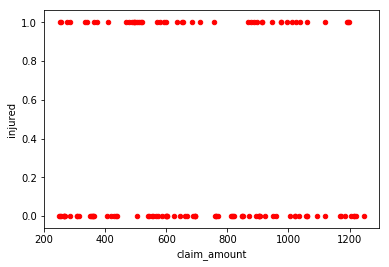

In [49]:
import matplotlib.pyplot as plt
data_test

injured = []
claim_amount = []
parsed_claim_amount = []

#change yes/no from Injury? to 1/0 so it can be scattered plotted
for row in data_test['Injury?']:
    if( row == "Yes"):
        injured.append(1)           
    else: 
        injured.append(0)

#creating another column to use numeric values 
for row in data_test['Claim Amount']:
    new_row = row.replace(',','')
    claim_amount.append(new_row[1:])

#append the column with the values already as Integers since it woould be the only way that scatter plot would see it
for string in claim_amount:
    parsed_claim_amount.append(int(string))

data_test['injured'] = injured
data_test['claim_amount'] = parsed_claim_amount


data_test.plot(kind='scatter', x='claim_amount', y='injured', color='red')
plt.show()


# len(injured)
# len(data_test)
# len(claim_amount)
# data_test
# parsed = int(claim_amount[10])
# parsed
# len(parsed_claim_amount)

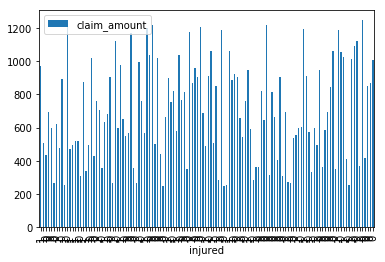

In [53]:
#plotting specific values
data_test.plot(kind='bar',x='injured', y='claim_amount')
plt.show()


From this point will be visualized the data in terms of when is being more the 
amount to pay, with injuries or with not injuries

In [79]:
#this dataframes is created in order to visualize when are claims more expensive
#declare general variables and dataframe
totals_df = pd.DataFrame()
total_injured_amount = 0
total_not_injured_amount = 0

#iterating the rows and view as objects in order to have access to the different features
for i,j in data_test.iterrows():
    if j.injured == 1:
        total_injured_amount += j.claim_amount
    elif j.injured == 0:
        total_not_injured_amount += j.claim_amount

#arrays to create the dataframe 
bool_injured = [ "Yes", "No"]
totals_array = [total_injured_amount , total_not_injured_amount]
#create the dataframe
totals_df['Injured'] = bool_injured
totals_df['Amount Totals'] = totals_array

#drop former columns off the table
totals_df.drop(["Not Injured Amount Totals","Injured Amount Totals"],axis=1)

,Injured,Amount Totals
0,Yes,32376
1,No,55685


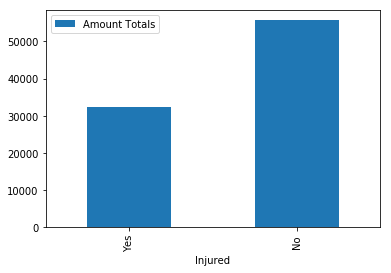

In [85]:
#plotting the totals

totals_df.plot(kind='bar',x='Injured', y='Amount Totals')
plt.show()
